In [2]:
import torch

In [3]:
activations_path='./activations_with_input.pt'

In [4]:
activations = torch.load(activations_path)

In [5]:
activations.keys()

dict_keys(['scratch.head1', 'scratch.output_conv', 'input'])

In [17]:
activations.keys()

dict_keys(['scratch.head1', 'scratch.output_conv', 'input'])

In [18]:
activations['scratch.head1'].shape, activations['scratch.head1'].shape, activations['input'].shape

(torch.Size([1, 512, 240, 240]),
 torch.Size([1, 512, 240, 240]),
 torch.Size([1, 3, 480, 480]))

In [22]:
activations['input'][0].cpu().transpose(0,2).shape

torch.Size([480, 480, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


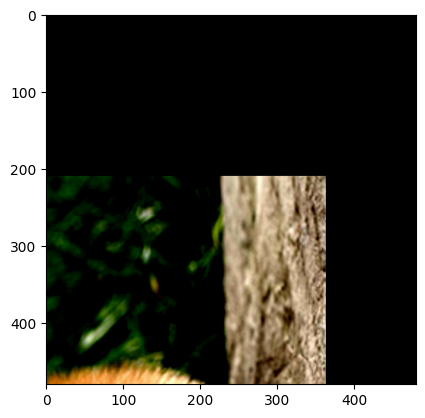

In [21]:
plt.imshow(activations['input'][0].cpu().transpose(0,2))

In [7]:
features = activations["scratch.head1"].cpu().squeeze().numpy().reshape(-1, 512)

In [8]:
# from sklearn.manifold import TSNE
# embedding = TSNE(n_components=3, verbose=1).fit_transform(features.reshape(-1, 1))

import umap
reducer = umap.UMAP(n_components=3, verbose=1)
embedding = reducer.fit_transform(features)
embedding.shape

2023-03-13 08:18:50.049834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 08:18:50.164159: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-13 08:18:50.877638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-13 08:18:50.877712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

UMAP(n_components=3, verbose=1)
Mon Mar 13 08:18:51 2023 Construct fuzzy simplicial set
Mon Mar 13 08:18:51 2023 Finding Nearest Neighbors
Mon Mar 13 08:18:51 2023 Building RP forest with 17 trees
Mon Mar 13 08:18:52 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Mon Mar 13 08:19:04 2023 Finished Nearest Neighbor Search
Mon Mar 13 08:19:07 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Mar 13 08:19:44 2023 Finished embedding


(57600, 3)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

In [17]:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=3)
# pca.fit(features)
# pca_out = pca.transform(features)
# tx, ty = pca_out[:, 0], pca_out[:, 1]

In [12]:
tx.reshape(240,240).shape, embedding.reshape(240,240,3).shape

((240, 240), (240, 240, 3))

In [15]:
embedding=embedding.reshape(240,240,3)
for channel in range(3):
    embedding[:,:,channel] = scale_to_01_range(embedding[:,:,channel])

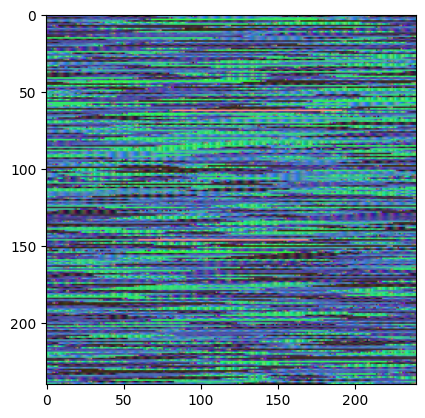

In [16]:
plt.imshow(embedding)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


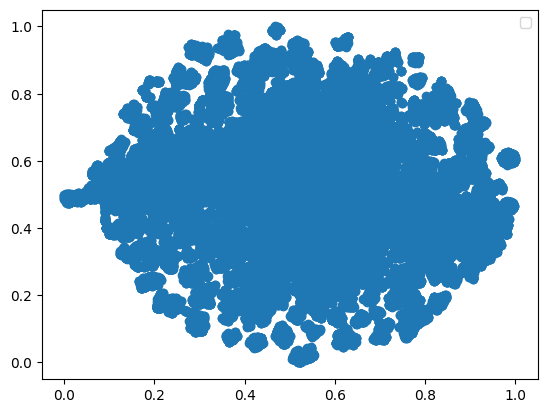

In [16]:

# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
 
ax.scatter(tx, ty)
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


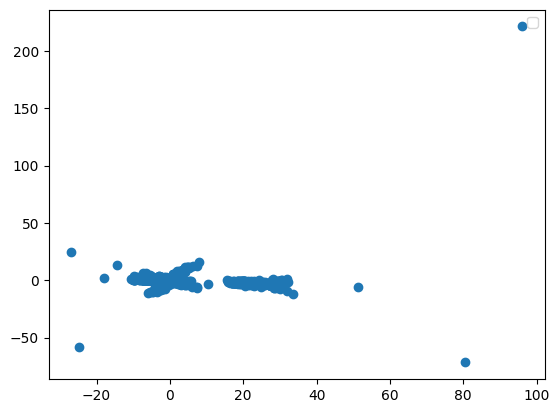

In [19]:

# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
 
ax.scatter(tx, ty)
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

LSeg Input

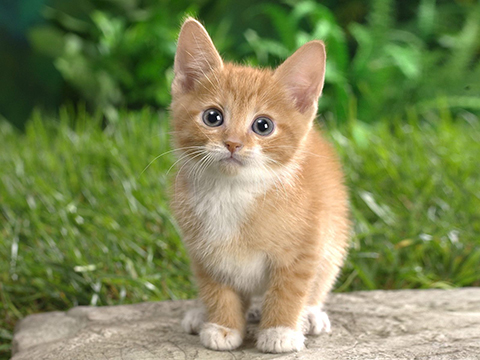

In [20]:
from PIL import Image
Image.open("/media/master/MyPassport/msc_studies/second_semester/3d_vision/related_work/lang-seg/inputs/cat1.jpeg")